In [2]:
import pandas as pd
import numpy as np

# Generar datos de fechas mensuales durante los últimos 5 años
dates = pd.date_range(start='2018-01-01', periods=60, freq='M')

# Generar datos ficticios de ventas mensuales
np.random.seed(0)
sales = np.random.randint(100, 500, size=(60,))

# Crear un DataFrame con los datos
data = pd.DataFrame({'fecha': dates, 'ventas': sales})

# Guardar los datos en un archivo CSV
data.to_csv('ventas_mensuales.csv', index=False)


/var/folders/k4/jmfcdlnj0737gj65_12sh9wm0000gn/T/ipykernel_33260/3463256033.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=60, freq='M')


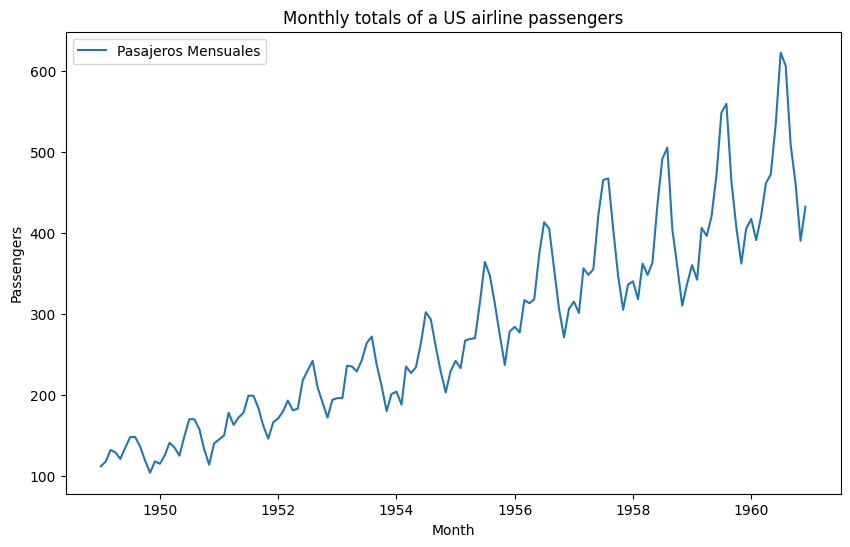

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.title('Monthly totals of a US airline passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

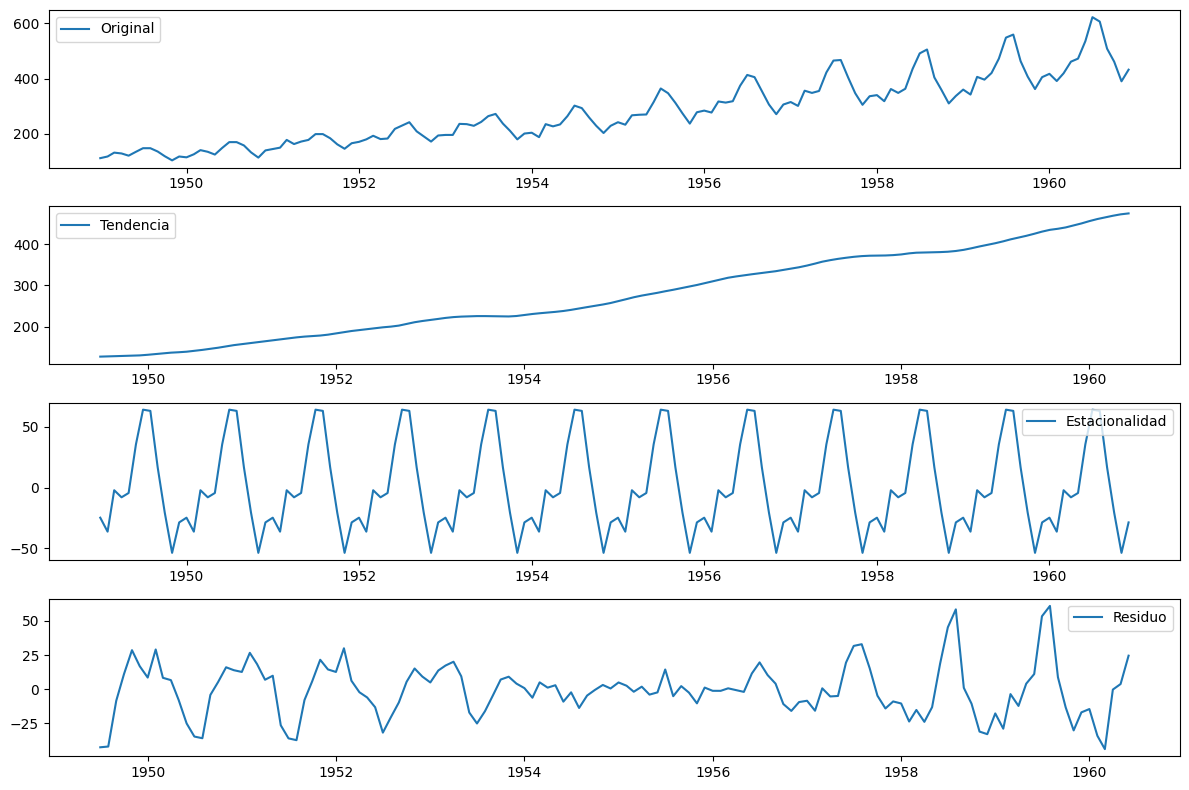

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotear los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

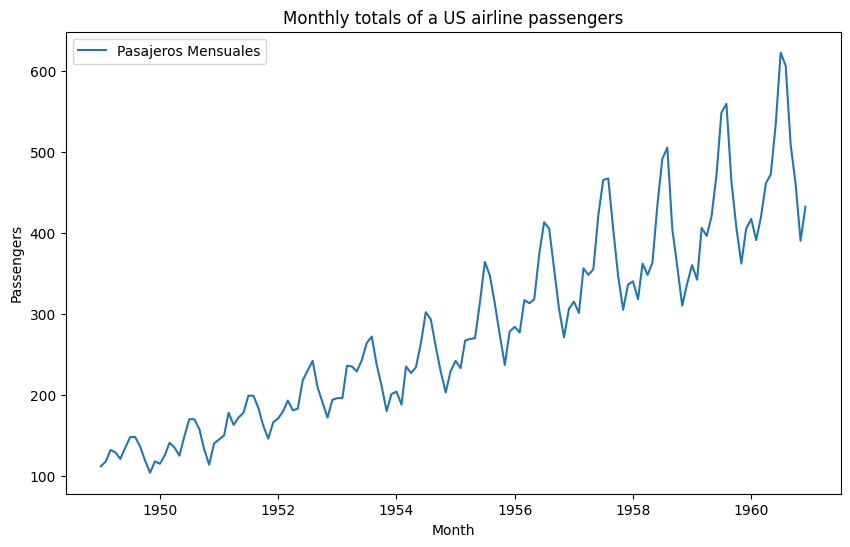

ADF Statistic: 0.8153688792060447
p-value: 0.9918802434376409


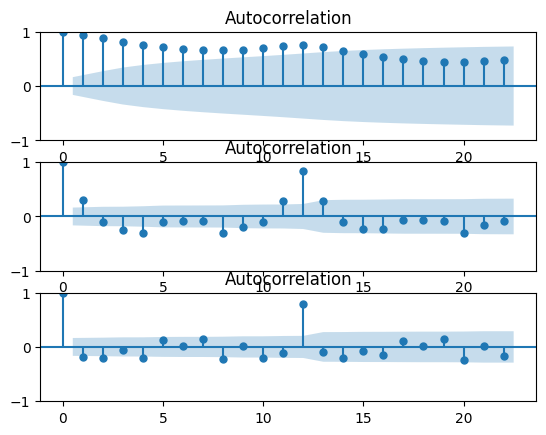

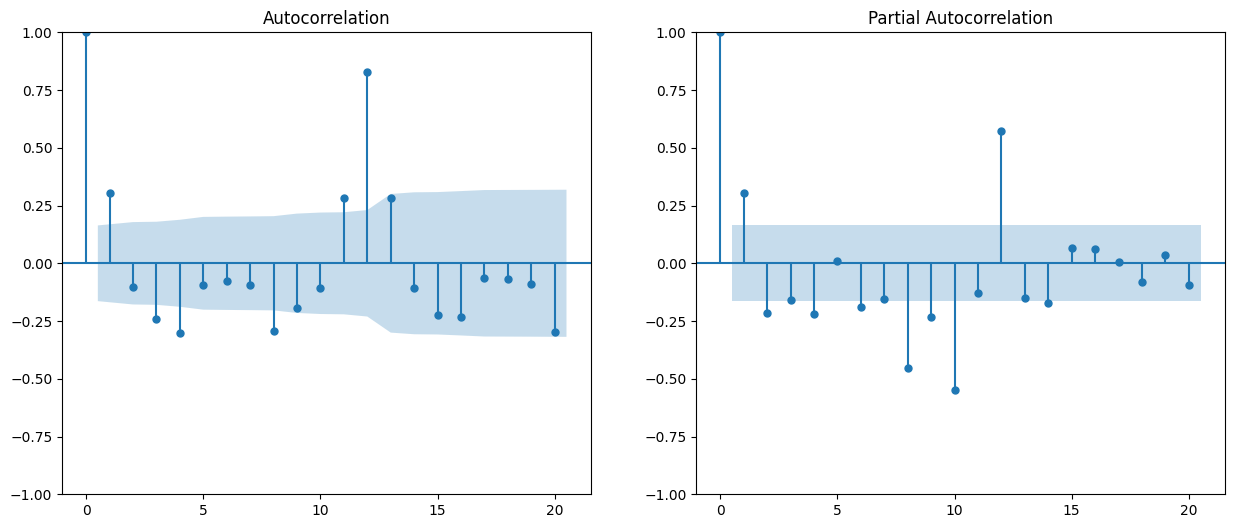

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['Passengers']

# Plotear la serie de tiempo original
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.title('Monthly totals of a US airline passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Verificar estacionariedad utilizando la prueba de Dickey-Fuller aumentada
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si la serie no es estacionaria, diferenciar los datos
differenced_series = series.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf 
fig, (ax1, ax2, ax3) = plt.subplots(3) 
plot_acf(series, ax=ax1) 
plot_acf(series.diff().dropna(), ax=ax2) 
plot_acf(series.diff().diff().dropna(), ax=ax3)

# Identificación de los parámetros p y q utilizando ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(differenced_series, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()




/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihoo

                               SARIMAX Results                                
Dep. Variable:                 ventas   No. Observations:                   60
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -358.821
Date:                Sat, 13 Jul 2024   AIC                            737.641
Time:                        20:31:12   BIC                            758.416
Sample:                    01-31-2018   HQIC                           745.751
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4297      0.440     -0.976      0.329      -1.293       0.433
ar.L2         -0.1616      0.210     -0.770      0.442      -0.573       0.250
ar.L3         -0.1484      0.217     -0.684      0.4

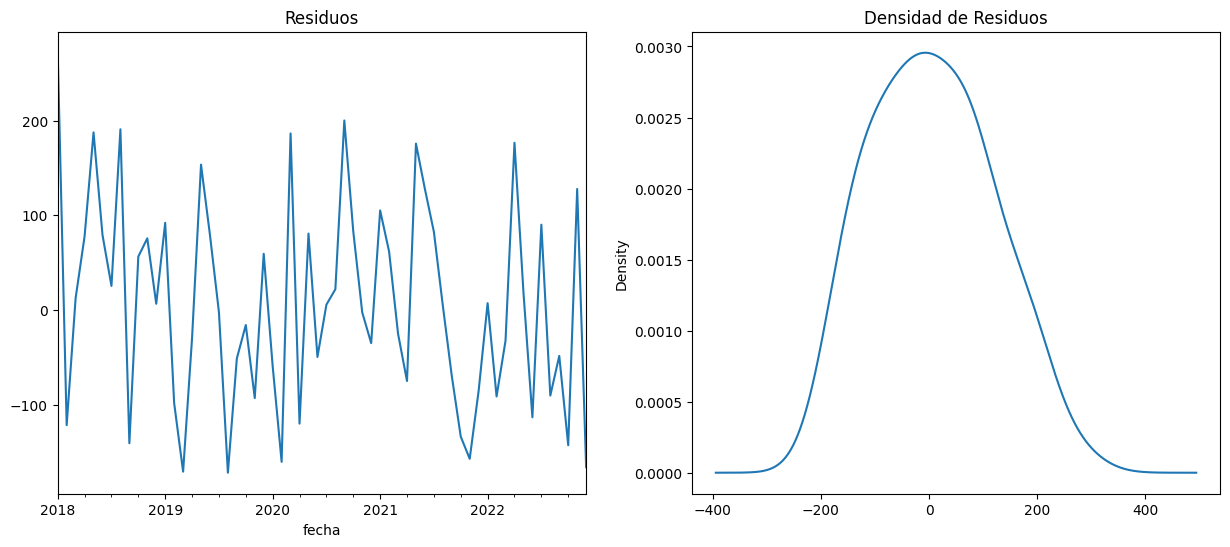

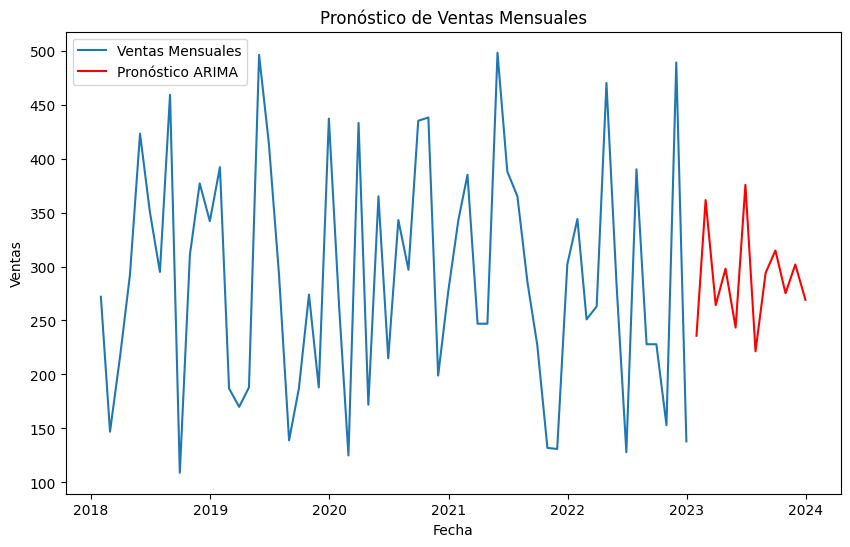

In [7]:

# Construcción del modelo ARIMA
model = ARIMA(series, order=(7, 1, 2))  # Ajustar p, d, q según los gráficos ACF y PACF
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Diagnóstico de residuos
residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuos", ax=axes[0])
residuals.plot(kind='kde', title='Densidad de Residuos', ax=axes[1])
plt.show()

# Pronóstico
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(series, label='Ventas Mensuales')
plt.plot(forecast, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

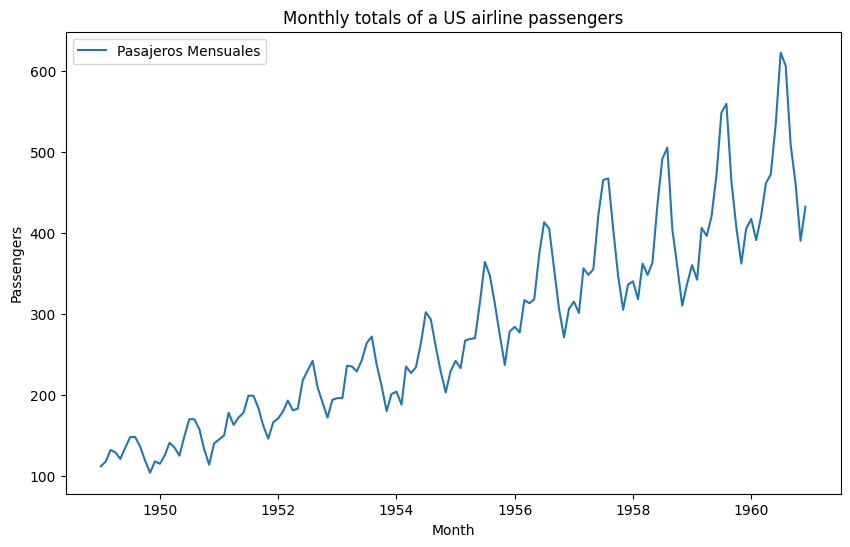

22:03:55 - cmdstanpy - INFO - Chain [1] start processing
22:03:55 - cmdstanpy - INFO - Chain [1] done processing
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python dat

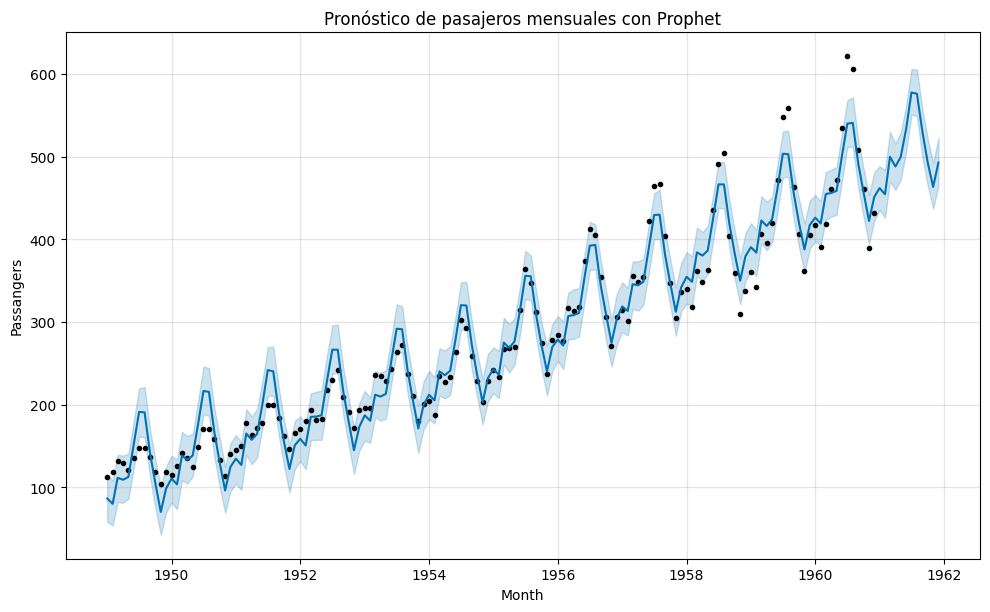

/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in

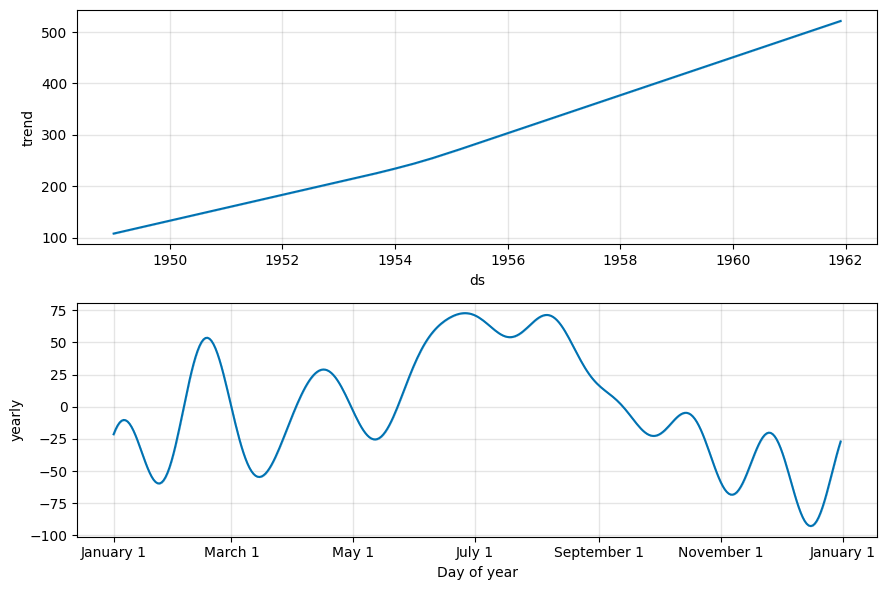

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data = data.reset_index()
data.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.title('Monthly totals of a US airline passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Construir el modelo Prophet
model = Prophet()
model.fit(data)

# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar pronósticos
fig = model.plot(forecast)
plt.title('Pronóstico de pasajeros mensuales con Prophet')
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()


Epoch 1/20


/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 - 1s - 17ms/step - loss: 0.2037
Epoch 2/20
46/46 - 0s - 1ms/step - loss: 0.0903
Epoch 3/20
46/46 - 0s - 998us/step - loss: 0.0844
Epoch 4/20
46/46 - 0s - 976us/step - loss: 0.0853
Epoch 5/20
46/46 - 0s - 913us/step - loss: 0.0835
Epoch 6/20
46/46 - 0s - 1ms/step - loss: 0.0825
Epoch 7/20
46/46 - 0s - 905us/step - loss: 0.0823
Epoch 8/20
46/46 - 0s - 825us/step - loss: 0.0825
Epoch 9/20
46/46 - 0s - 843us/step - loss: 0.0815
Epoch 10/20
46/46 - 0s - 812us/step - loss: 0.0807
Epoch 11/20
46/46 - 0s - 848us/step - loss: 0.0814
Epoch 12/20
46/46 - 0s - 860us/step - loss: 0.0834
Epoch 13/20
46/46 - 0s - 858us/step - loss: 0.0803
Epoch 14/20
46/46 - 0s - 824us/step - loss: 0.0799
Epoch 15/20
46/46 - 0s - 831us/step - loss: 0.0813
Epoch 16/20
46/46 - 0s - 854us/step - loss: 0.0832
Epoch 17/20
46/46 - 0s - 842us/step - loss: 0.0806
Epoch 18/20
46/46 - 0s - 830us/step - loss: 0.0804
Epoch 19/20
46/46 - 0s - 881us/step - loss: 0.0804
Epoch 20/20
46/46 - 0s - 767us/step - loss: 0.0799
2/2 ━

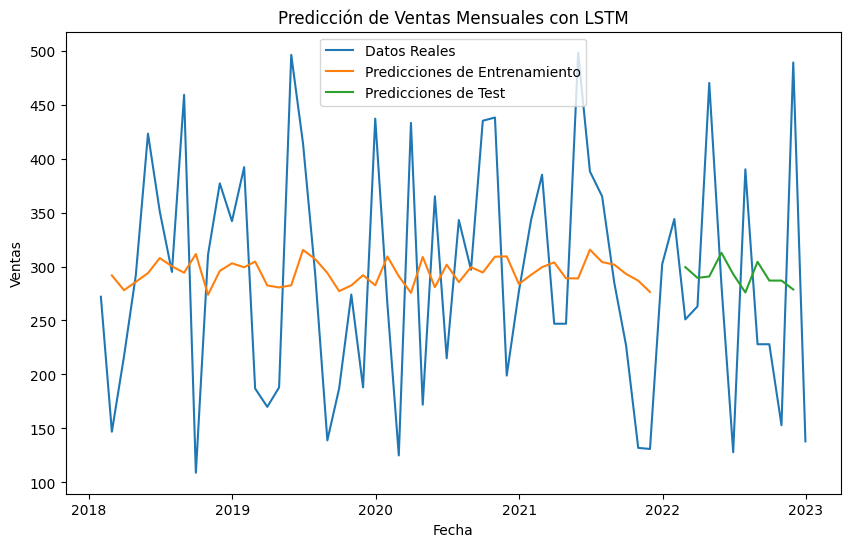

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Cargar datos de ejemplo
data = pd.read_csv('ventas_mensuales.csv', parse_dates=['fecha'], index_col='fecha')

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape data to [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización de los datos
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Datos Reales')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Predicciones de Entrenamiento')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(data) - 1], test_predict, label='Predicciones de Test')
plt.title('Predicción de Ventas Mensuales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()
